# Custom training: walkthrough

## 0. TensorFlow programming

## 1. Setup program

### i. Configure imports

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.1
Eager execution: True


## 2. The Iris classification problem

## 3. Import and parse the training dataset

### i. Download the dataset

In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\admin\.keras\datasets\iris_training.csv


### ii. Inspect the data

In [3]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [4]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

### iii. Create a tf.data.Dataset

In [5]:
batch_size = 32

# shuffle=True, shuffle_buffer_size=10000
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [6]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.4, 6.4, 5.8, 6.6, 6.1, 6.6, 4.9, 6.9, 5.7, 6. , 5.6, 5.2, 5. ,
       5.6, 7.7, 7.7, 7.9, 4.4, 5.4, 4.8, 5.1, 5.8, 6.3, 6.5, 4.6, 5. ,
       6.3, 6.4, 6.2, 6.9, 4.9, 4.6], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 2.8, 2.7, 3. , 2.8, 2.9, 3. , 3.2, 4.4, 2.9, 2.9, 2.7, 3.4,
       2.5, 3.8, 2.8, 3.8, 2.9, 3.4, 3. , 3.5, 2.7, 3.3, 3. , 3.2, 3.5,
       2.3, 3.1, 2.8, 3.1, 3.1, 3.1], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.3, 5.6, 4.1, 4.4, 4. , 4.6, 1.4, 5.7, 1.5, 4.5, 3.6, 3.9, 1.5,
       3.9, 6.7, 6.7, 6.4, 1.4, 1.5, 1.4, 1.4, 5.1, 4.7, 5.8, 1.4, 1.6,
       4.4, 5.5, 4.8, 5.1, 1.5, 1.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.3, 2.2, 1. , 1.4, 1.3, 1.3, 0.2, 2.3, 0.4, 1.5, 1.3, 1.4, 0.2,
       1.1, 2.2, 2. , 2. , 0.2, 0.4, 0.3, 0.3, 1.9, 1.6, 2.2,

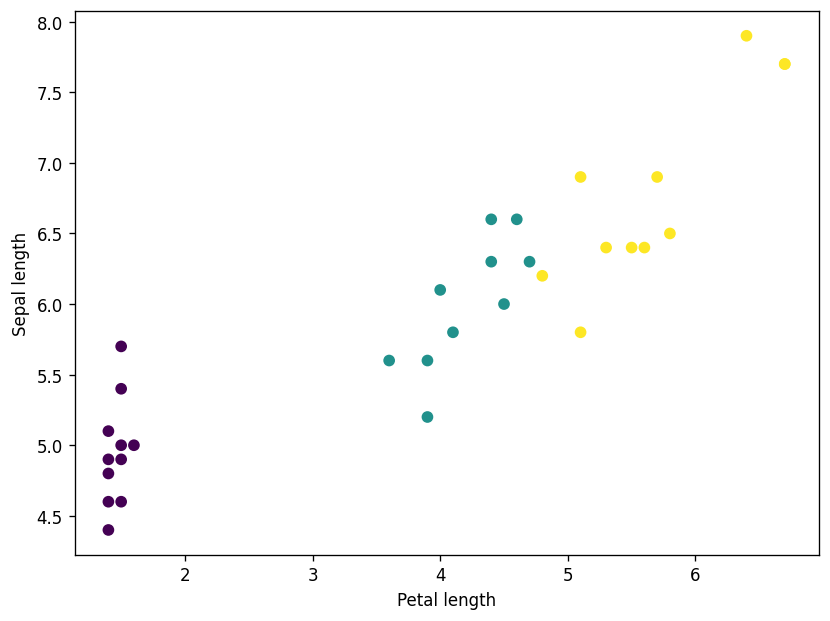

In [8]:
plt.figure(figsize=(8,6), dpi=120)
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [9]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [10]:
train_dataset = train_dataset.map(pack_features_vector)

In [11]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.5 2.8 4.6 1.5]
 [6.  2.9 4.5 1.5]
 [4.6 3.1 1.5 0.2]
 [6.1 2.6 5.6 1.4]
 [5.  3.5 1.3 0.3]], shape=(5, 4), dtype=float32)


## 4. Select the type of model

### i. Why model?

### ii. Select the model

### iii. Create a model using Keras

In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

### iv. Using the model

In [16]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 3.622939  ,  0.24170117,  0.55546844],
       [ 3.44004   ,  0.32901588,  0.56511235],
       [ 1.7217182 , -0.7782884 , -0.16640891],
       [ 4.070366  ,  0.7552707 ,  0.8450111 ],
       [ 1.6995177 , -0.89097595, -0.25155443]], dtype=float32)>

In [17]:
# Here, each example returns a logit for each class.

# To convert these logits to a probability for each class, use the softmax function:

tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.9254598 , 0.03147056, 0.04306972],
       [0.90828544, 0.04046893, 0.05124566],
       [0.81074107, 0.06654923, 0.12270972],
       [0.9293057 , 0.03376222, 0.03693217],
       [0.8216221 , 0.0616077 , 0.11677025]], dtype=float32)>

In [18]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 1 0 2 0 0 0 2 1 0 0 0 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 1 0 1 0 2]


## 5. Train the model

### i. Define the loss and gradient function

In [19]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [20]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.954013705253601


In [21]:
# Use the tf.GradientTape context to calculate the gradients used to optimize your model:

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

### ii. Create an optimizer

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [23]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.954013705253601
Step: 1,         Loss: 1.6330815553665161


### iii. Training loop

In [24]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.525, Accuracy: 35.000%
Epoch 050: Loss: 0.453, Accuracy: 84.167%
Epoch 100: Loss: 0.277, Accuracy: 98.333%
Epoch 150: Loss: 0.176, Accuracy: 97.500%
Epoch 200: Loss: 0.140, Accuracy: 98.333%


### iv. Visualize the loss function over time

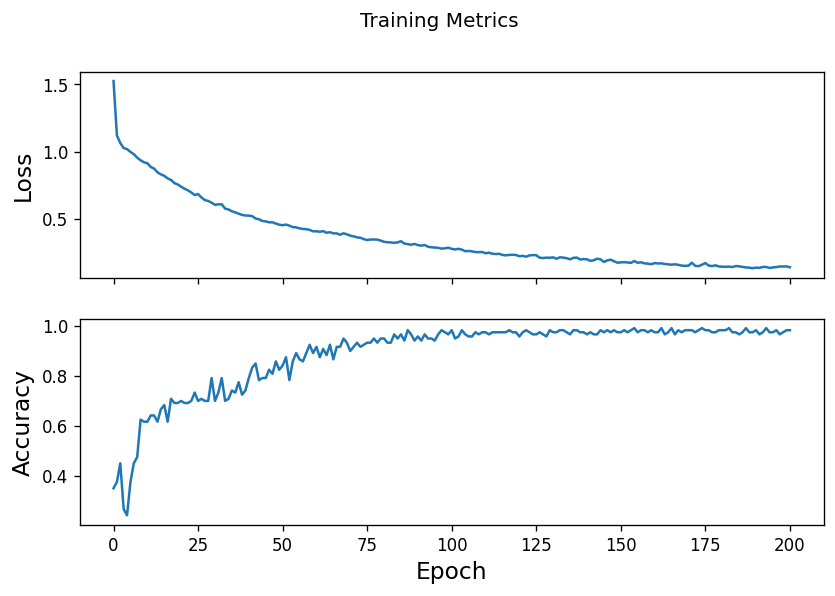

In [27]:
fig, axes = plt.subplots(2, sharex=True, figsize=(8, 5), dpi=120)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## 6. Evaluate the model's effectiveness

### i. Setup the test dataset

In [28]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


In [29]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

### ii. Evaluate the model on the test dataset

In [30]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [31]:
# We can see on the last batch, for example, the model is usually correct:

tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

## 7. Use the trained model to make predictions

In [32]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.6%)
Example 1 prediction: Iris versicolor (90.5%)
Example 2 prediction: Iris virginica (77.3%)


# reference

### https://tensorflow.google.cn/tutorials/customization/custom_training_walkthrough#use_the_trained_model_to_make_predictions